In [132]:
import numpy as np
import matplotlib.pyplot as plt
import funkcije_seminar as f

In [133]:
t = f.neodvisna_spremenljivka_t(40);
delta_t = t[1] - t[0];
#print size of np.array t
print(t.shape)

(40001,)


In [173]:
# b = np.zeros([10])
# for i in range(1, 10):
#     a_i = i
#     b[i]= a_i
#     print(f'a_{i} = {a_i}')
# b[:2]

In [135]:
kolo = np.array([10, 40])
speed = np.array([5, 10, 20, 30, 35, 40, 60, 90, 130])
# speed = np.array([10, 20])
frek = speed/3.6
omega_rez = np.zeros(2*len(kolo))

rez_x_10 = np.zeros([4*len(speed), len(t)])
rez_x_40 = np.zeros([4*len(speed), len(t)])

rez_a_10 = np.zeros([4*len(speed), len(t)])
rez_a_40 = np.zeros([4*len(speed), len(t)])
rez_x_10.shape, rez_x_40.shape, rez_a_10.shape, rez_a_40.shape

((36, 40001), (36, 40001), (36, 40001), (36, 40001))

In [136]:
speed[0:3]

array([ 5, 10, 20])

In [137]:
2*len(kolo)

4

In [174]:
# for i in range(0, len(kolo)):
#     for j in range(0, len(speed)):
#         print(f'kolo = {kolo[i]}, speed = {speed[j]}')

In [139]:
# for j in range(0, len(speed)):
#     rez_j = np.zeros([len(kolo), len(t)])
#     a = speed[j]
#     rez_a = np.ones([len(kolo), len(t)])
#     print(j)
#     print(f'speed = {speed[j]}')
#     print(f'rez_a = {rez_a}')

In [140]:
print(f'omega1')
for i in range(0, len(kolo)):
    for j in range(0, len(speed)):
        M, K, delta1, delta2, eigenvalues, eigenvectors, omega1, omega2, omega1D, omega2D, modal_mass_m, modal_stiffness_m = f.analiza1(m1=kolo[i], m2=350, k1=260*1000, k2=40*1000, delta1=0.1, delta2= 0.3)
        ff, Y, Y_v, Y_a, Ft, Modal_Ft = f.vzbujanje(M=M, t=t, delta_t=delta_t, eigenvectors=eigenvectors, hitrost=speed[j], L=0.5, o=0.1)
        eta, etaD = f.konvolucija(t=t, Modal_Ft=Modal_Ft, omega1=omega1, omega2=omega2, omega1D=omega1D, omega2D=omega2D, delta1=delta1, delta2=delta2, delta_t=delta_t)
        x_i_j, xD_i_j, a_i_j, aD_i_j = f.rezultat(eta=eta, etaD=etaD, eigenvectors=eigenvectors, t=t, delta_t=delta_t, Y=Y)
        print(f'i = {i}, j = {j}')
        print(f'm1 = {kolo[i]}, speed = {speed[j]}')
        print(M)
        print(K)
        print(f'omega1 = {omega1}, omega2 = {omega2}')
        print(F'{ff:.3f} Hz')
        if (i==0):
            rez_x_10[4*j:4*j+1+1][:] = x_i_j
            rez_x_10[4*j+2:4*j+3+1][:] = xD_i_j
            rez_a_10[4*j:4*j+1+1][:] = a_i_j
            rez_a_10[4*j+2:4*j+3+1][:] = aD_i_j
            omega_rez[:2*i+2] = np.array([omega1, omega2])
        else:
            rez_x_40[4*j:4*j+1+1][:] = x_i_j
            rez_x_40[4*j+2:4*j+3+1][:] = xD_i_j
            rez_a_40[4*j:4*j+1+1][:] = a_i_j
            rez_a_40[4*j+2:4*j+3+1][:] = aD_i_j
            omega_rez[2:4] = np.array([omega1, omega2])
        print(4*j, 4*j+1+1, 4*j+2, 4*j+3+1)
        print(" ")

omega1
i = 0, j = 0
m1 = 10, speed = 5
[[ 10.   0.]
 [  0. 350.]]
[[300000. -40000.]
 [-40000.  40000.]]
omega1 = 9.949732071212829, omega2 = 173.24920936615206
1.389 Hz
0 2 2 4
 
i = 0, j = 1
m1 = 10, speed = 10
[[ 10.   0.]
 [  0. 350.]]
[[300000. -40000.]
 [-40000.  40000.]]
omega1 = 9.949732071212829, omega2 = 173.24920936615206
2.778 Hz
4 6 6 8
 
i = 0, j = 2
m1 = 10, speed = 20
[[ 10.   0.]
 [  0. 350.]]
[[300000. -40000.]
 [-40000.  40000.]]
omega1 = 9.949732071212829, omega2 = 173.24920936615206
5.556 Hz
8 10 10 12
 
i = 0, j = 3
m1 = 10, speed = 30
[[ 10.   0.]
 [  0. 350.]]
[[300000. -40000.]
 [-40000.  40000.]]
omega1 = 9.949732071212829, omega2 = 173.24920936615206
8.333 Hz
12 14 14 16
 
i = 0, j = 4
m1 = 10, speed = 35
[[ 10.   0.]
 [  0. 350.]]
[[300000. -40000.]
 [-40000.  40000.]]
omega1 = 9.949732071212829, omega2 = 173.24920936615206
9.722 Hz
16 18 18 20
 
i = 0, j = 5
m1 = 10, speed = 40
[[ 10.   0.]
 [  0. 350.]]
[[300000. -40000.]
 [-40000.  40000.]]
omega1 = 9.949

In [141]:
print(f'omega_10_1 = {omega_rez[0]:.3f} rad/s')
print(f'omega_10_2 = {omega_rez[1]:.3f} rad/s')
print(f'omega_40_1 = {omega_rez[2]:.3f} rad/s')
print(f'omega_40_2 = {omega_rez[3]:.3f} rad/s')
print(omega_rez[0]/2/np.pi, omega_rez[1]/2/np.pi, omega_rez[2]/2/np.pi, omega_rez[3]/2/np.pi)

omega_10_1 = 9.950 rad/s
omega_10_2 = 173.249 rad/s
omega_40_1 = 9.942 rad/s
omega_40_2 = 86.692 rad/s
1.5835490415734836 27.573468057385792 1.5823244220378416 13.797404093307394


In [142]:
np.savetxt('rez_x_10.csv', rez_x_10, fmt="%d", delimiter=",")
np.savetxt('rez_x_40.csv', rez_x_40, fmt="%d", delimiter=",")
np.savetxt('rez_a_10.csv', rez_a_10, fmt="%d", delimiter=",")
np.savetxt('rez_a_40.csv', rez_a_40, fmt="%d", delimiter=",")
np.savetxt('omega_rez.csv', omega_rez, fmt="%d", delimiter=",")

In [151]:
rez_x_10.shape

(36, 40001)

In [144]:
# fig = plt.figure(figsize=(7, 7))
# # naslov = str(f'{frek[j]:.3f}')
# fig.suptitle(f'{frek[j]:.3f} Hz', fontsize=16)
# plt.title(label="aa", loc='center')
# plt.subplots_adjust(hspace=0.4)
# plt.subplot(2, 1, 1)
# plt.plot(t, rez_x_10[4*j, :], label=f'x1, m1 = 10, {frek[j]:.3f} Hz')
# plt.plot(t, rez_x_40[4*j, :], label=f'x1, m1 = 40, {frek[j]:.3f} Hz')
# plt.xlim(0, 5)
# plt.grid()
# plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(t, rez_x_10[4*j, :], label=f'x1, m1 = 10, {frek[j]:.3f} Hz')
# plt.plot(t, rez_x_40[4*j, :], label=f'x1, m1 = 40, {frek[j]:.3f} Hz')
# plt.xlim(11, 12)
# plt.grid()
# plt.legend()


35.000 km/h


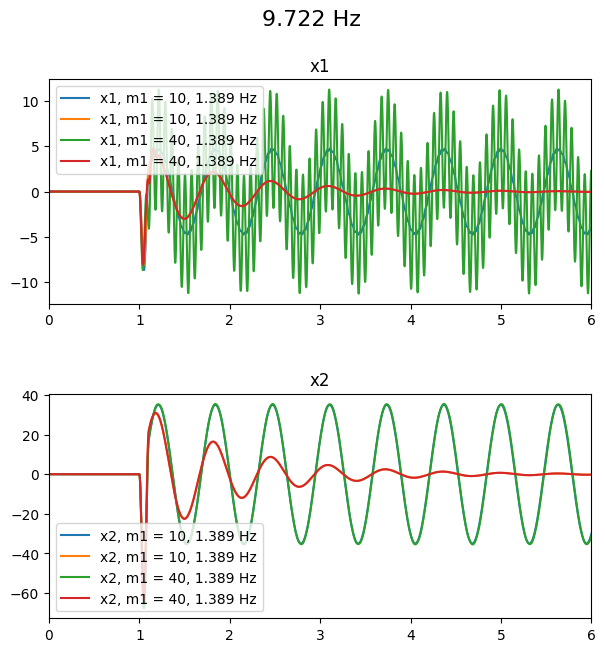

In [181]:
A = 4

print(f'{frek[A]*3.6:.3f} km/h')

fig = plt.figure(figsize=(7, 7))
fig.suptitle(f'{frek[A]:.3f} Hz', fontsize=16)
plt.subplot(2, 1, 1)
plt.title("x1")
plt.plot(t, rez_x_10[4*A+0][:], label=f'x1, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_10[4*A+2][:], label=f'x1, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_40[4*A+0][:], label=f'x1, m1 = 40, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_40[4*A+2][:], label=f'x1, m1 = 40, {frek[0]:.3f} Hz')
plt.xlim(0, 6)
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.title("x2")
plt.plot(t, rez_x_10[4*A+1][:], label=f'x2, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_10[4*A+3][:], label=f'x2, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_40[4*A+1][:], label=f'x2, m1 = 40, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_40[4*A+3][:], label=f'x2, m1 = 40, {frek[0]:.3f} Hz')
plt.xlim(0, 6)
plt.legend()

In [ ]:
A = 4

print(f'{frek[A]*3.6:.3f} km/h')

fig = plt.figure(figsize=(7, 7))
fig.suptitle(f'{frek[A]:.3f} Hz', fontsize=16)
plt.subplot(2, 1, 1)
plt.title("x1")
plt.plot(t, rez_x_10[4*A+0][:], label=f'x1, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_10[4*A+2][:], label=f'x1, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_40[4*A+0][:], label=f'x1, m1 = 40, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_40[4*A+2][:], label=f'x1, m1 = 40, {frek[0]:.3f} Hz')
plt.xlim(0, 6)
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.title("x2")
plt.plot(t, rez_x_10[4*A+1][:], label=f'x2, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_10[4*A+3][:], label=f'x2, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_40[4*A+1][:], label=f'x2, m1 = 40, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_40[4*A+3][:], label=f'x2, m1 = 40, {frek[0]:.3f} Hz')
plt.xlim(0, 6)
plt.legend()

In [ ]:
B = 2

print(f'{frek[A]*3.6:.3f} km/h')

fig = plt.figure(figsize=(7, 7))
fig.suptitle(f'{frek[A]:.3f} Hz', fontsize=16)
plt.subplot(2, 1, 1)
plt.title("x1")
plt.plot(t, rez_x_10[4*A+0][:], label=f'x1, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_10[4*A+2][:], label=f'x1, m1 = 10, {frek[0]:.3f} Hz')
plt.xlim(0, 6)
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.title("x2")
plt.plot(t, rez_x_10[4*A+1][:], label=f'x2, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_10[4*A+3][:], label=f'x2, m1 = 10, {frek[0]:.3f} Hz')
plt.xlim(0, 6)
plt.legend()

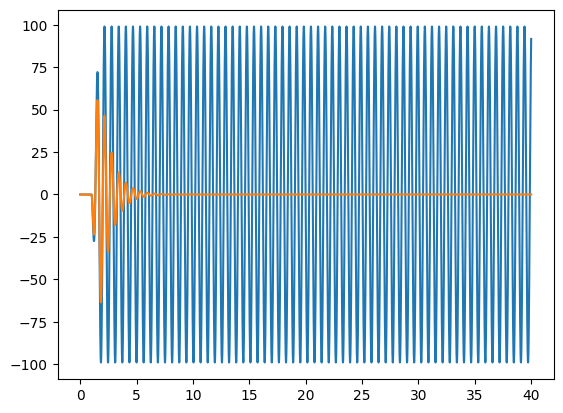

In [157]:
plt.plot(t, rez_x_10[4*A+1][:], label=f'x1, m1 = 10, {frek[0]:.3f} Hz')
plt.plot(t, rez_x_10[4*A+3][:], label=f'x1, m1 = 10, {frek[0]:.3f} Hz')

## telo 1, kolo

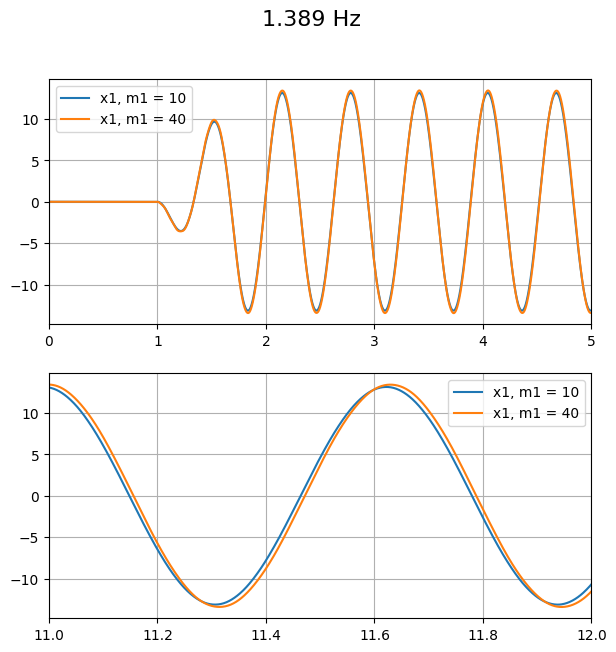

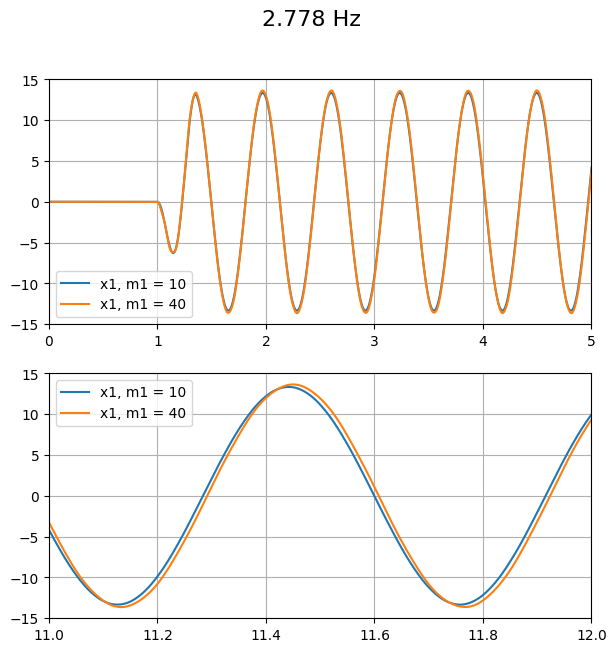

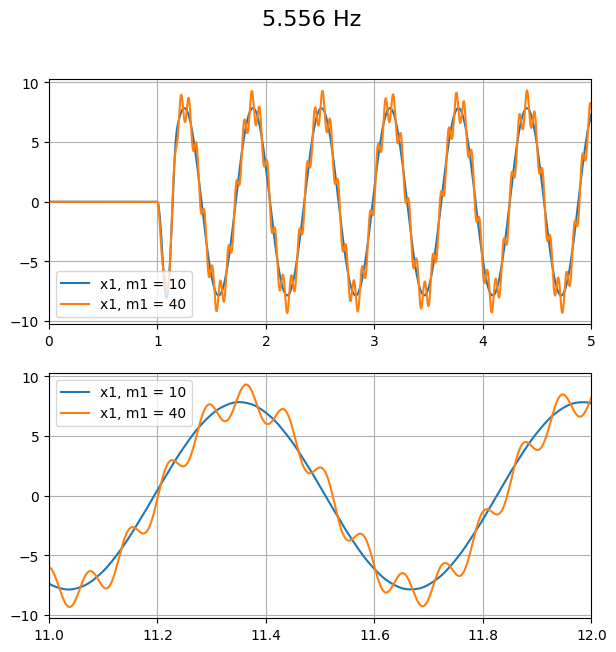

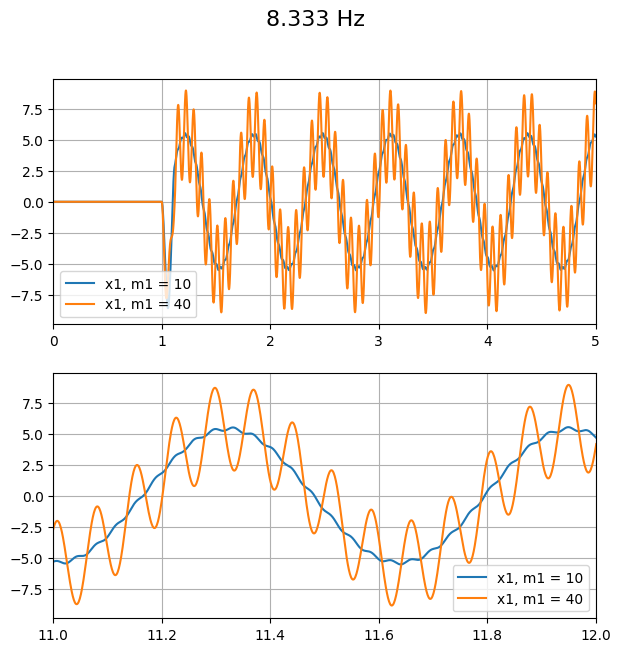

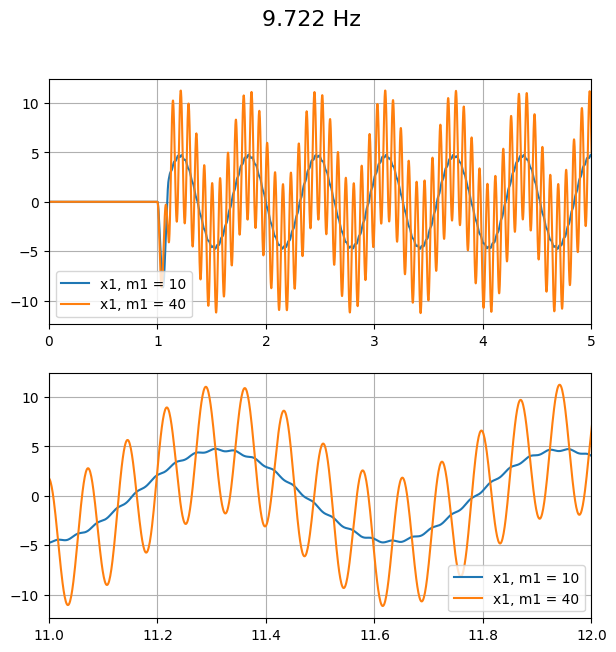

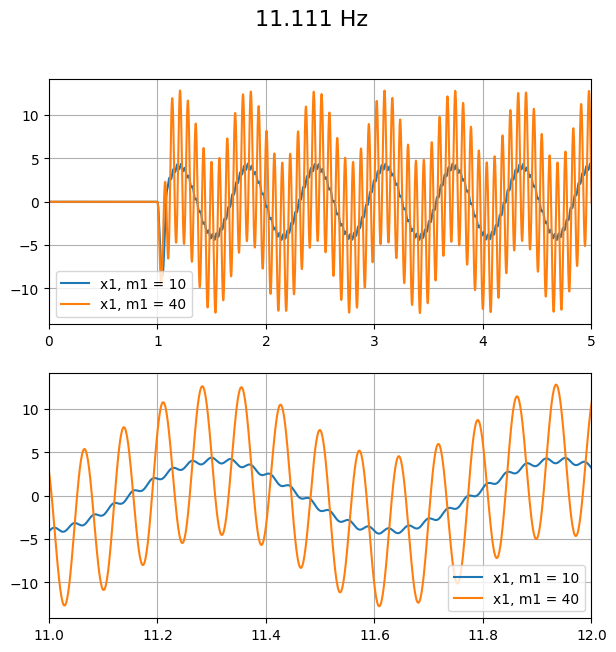

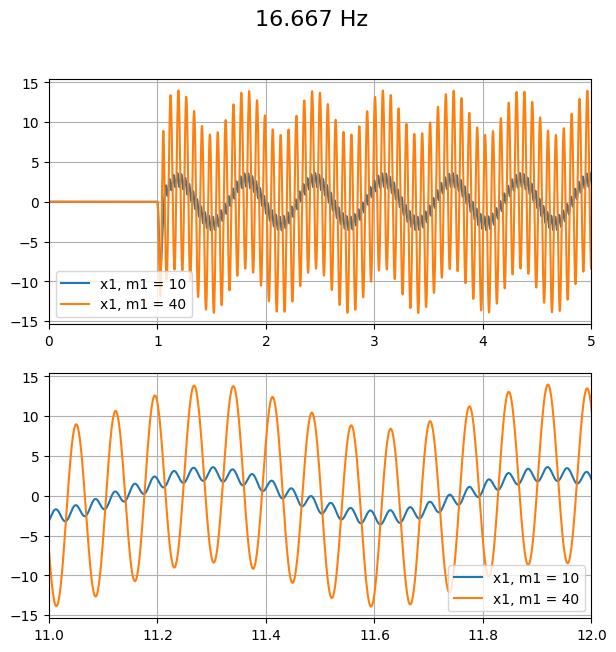

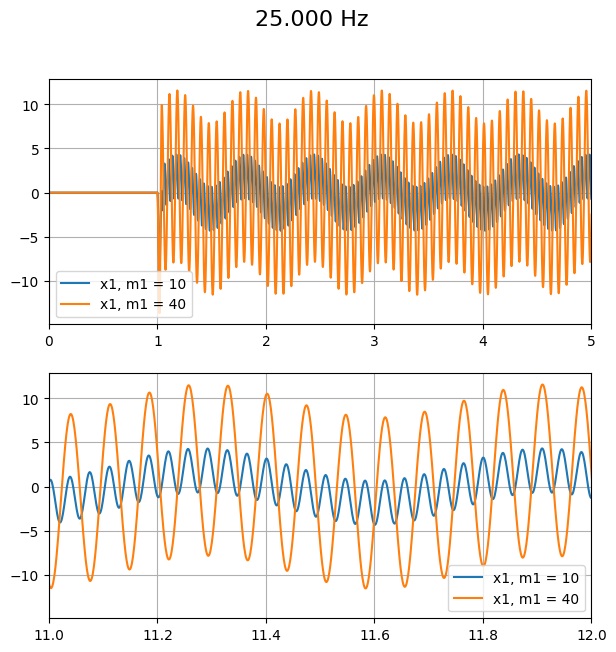

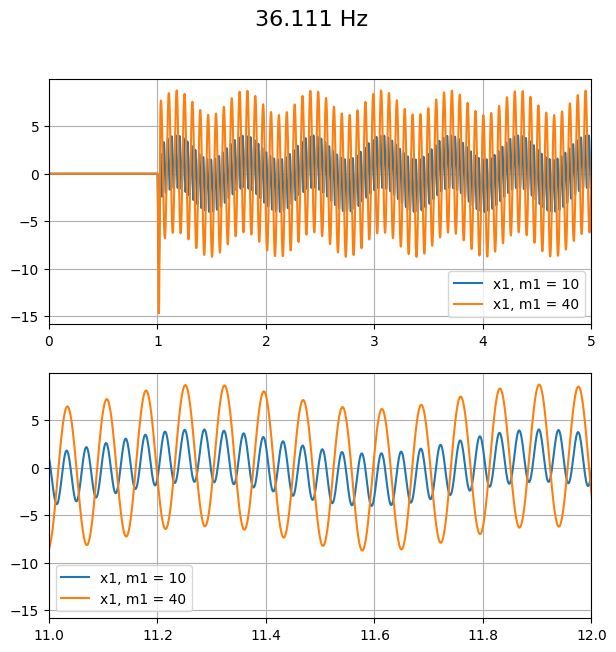

In [152]:
frek
for j in range(0, len(frek)):
    fig = plt.figure(figsize=(7, 7))
    fig.suptitle(f'{frek[j]:.3f} Hz', fontsize=16)
    plt.subplot(2, 1, 1)
    plt.plot(t,rez_x_10[4*j][:], label=f'x1, m1 = 10')
    plt.plot(t,rez_x_40[4*j][:], label=f'x1, m1 = 40')
    plt.xlim(0, 5)
    plt.grid()
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t,rez_x_10[4*j][:], label=f'x1, m1 = 10')
    plt.plot(t,rez_x_40[4*j][:], label=f'x1, m1 = 40')
    plt.xlim(11, 12)
    plt.grid()
    plt.legend()
# , {frek[j]:.3f} Hz )

In [146]:
# plt.plot(t,rez_x_10[3, :], label=f'x2d, m1 = 10, {frek[0]:.3f} Hz')
# # plt.plot(t,rez_x_10[1, :], label=f'x2, m1 = 10, {frek[0]:.3f} Hz')
# # plt.plot(t,rez_x_10[4, :], label=f'x1, {frek[1]:.3f} Hz')
# # plt.plot(t,rez_x_10[5, :], label=f'x2, {frek[1]:.3f} Hz')
# plt.plot(t,rez_x_40[3, :], label=f'x2d, m1 = 40, {frek[0]:.3f} Hz')
# # plt.plot(t,rez_x_40[1, :], label=f'x2, m1 = 40, {frek[0]:.3f} Hz')
# plt.xlim(1.3, 1.5)
# plt.grid()
# plt.legend()

## x1D

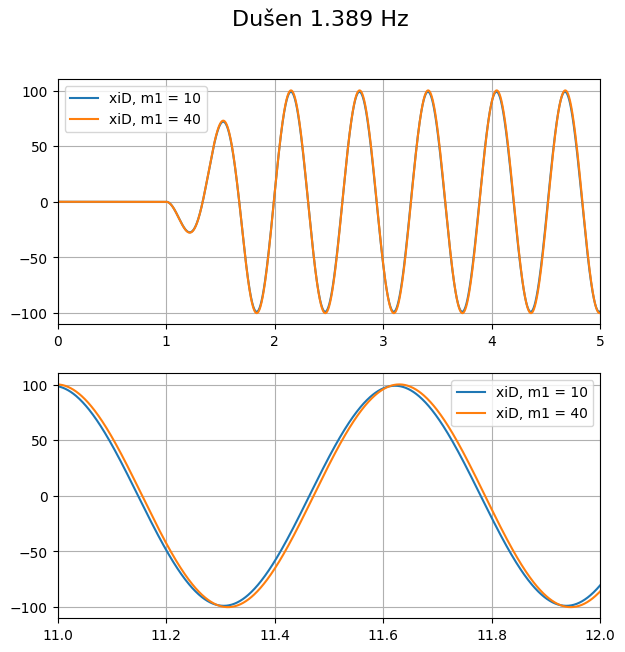

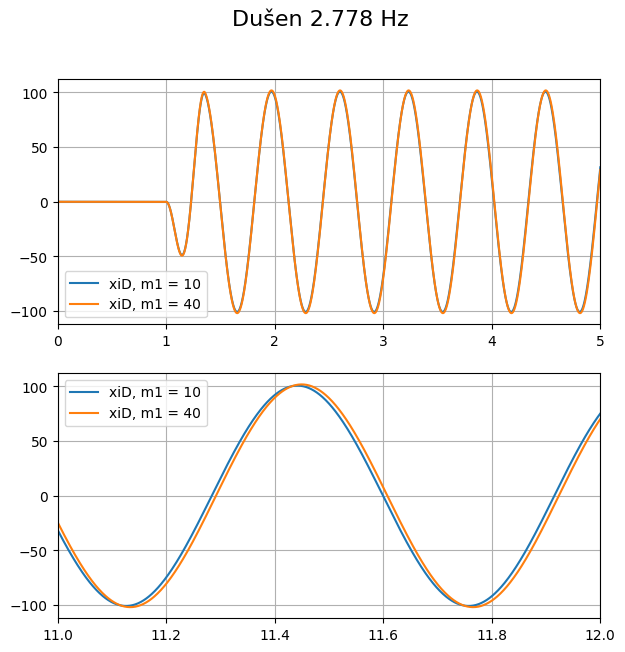

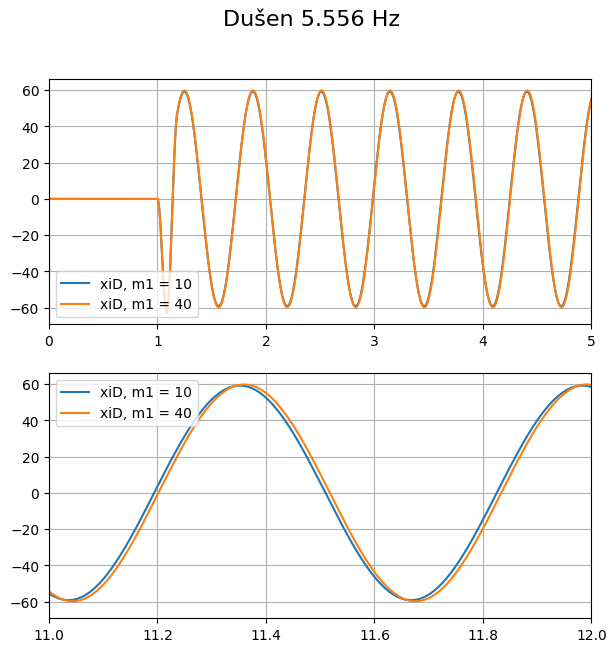

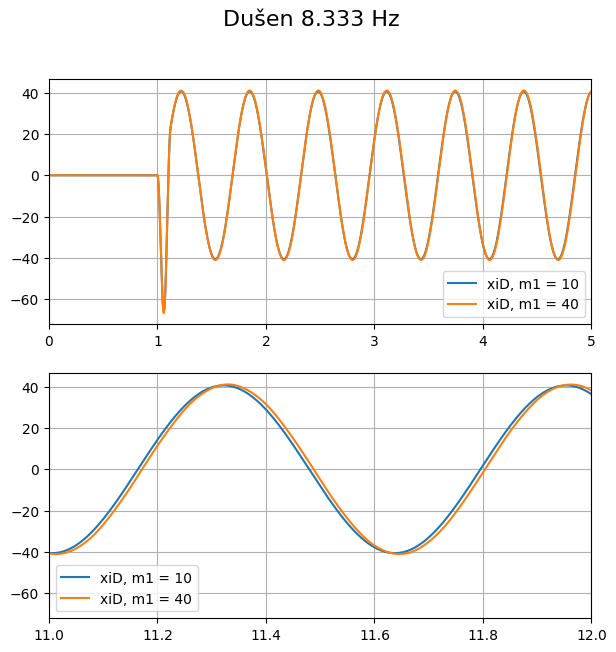

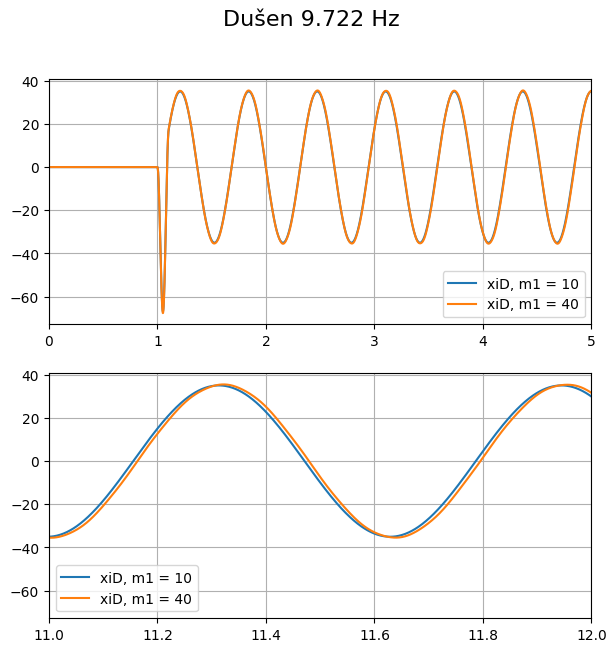

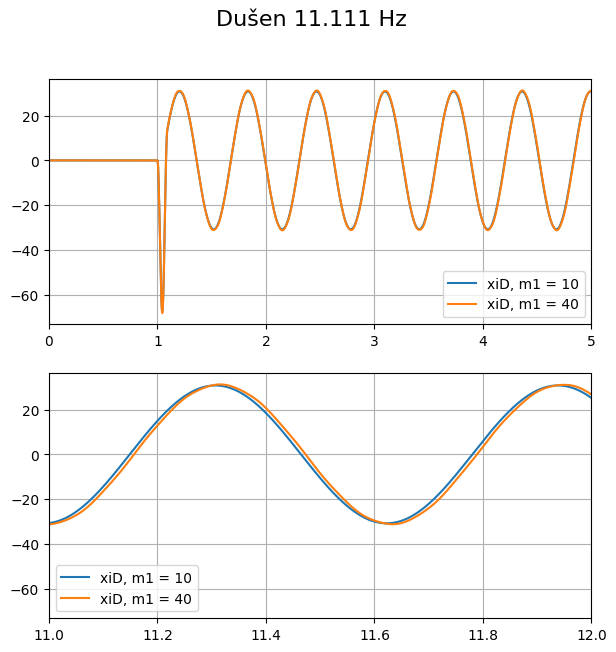

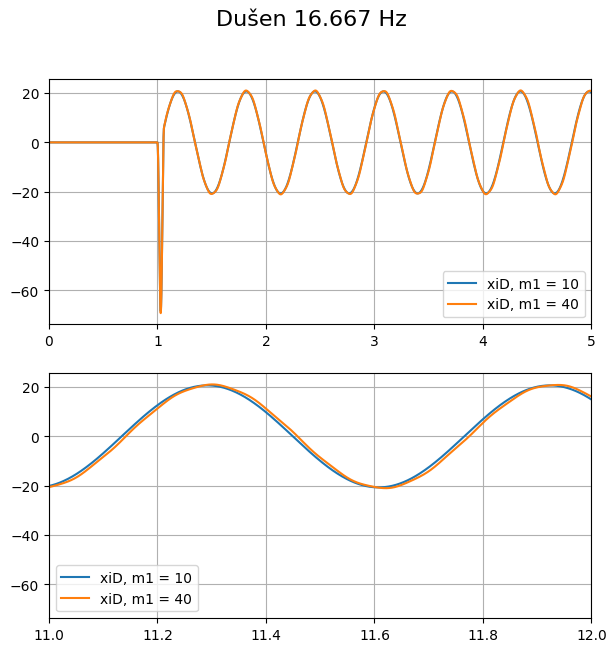

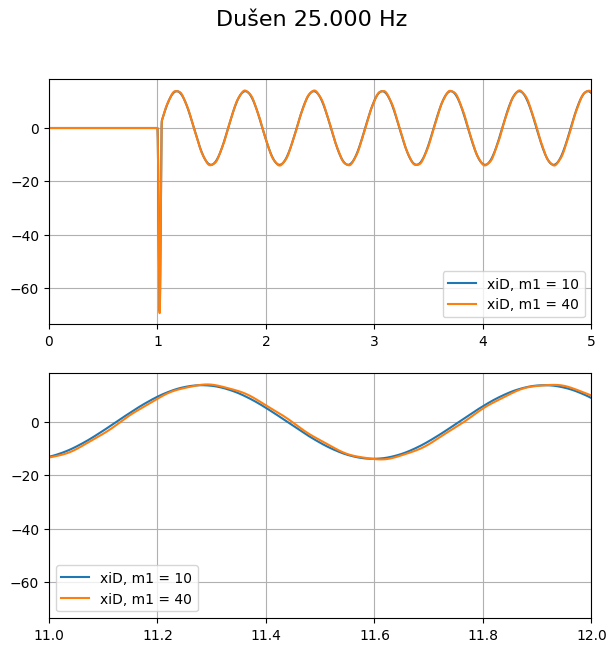

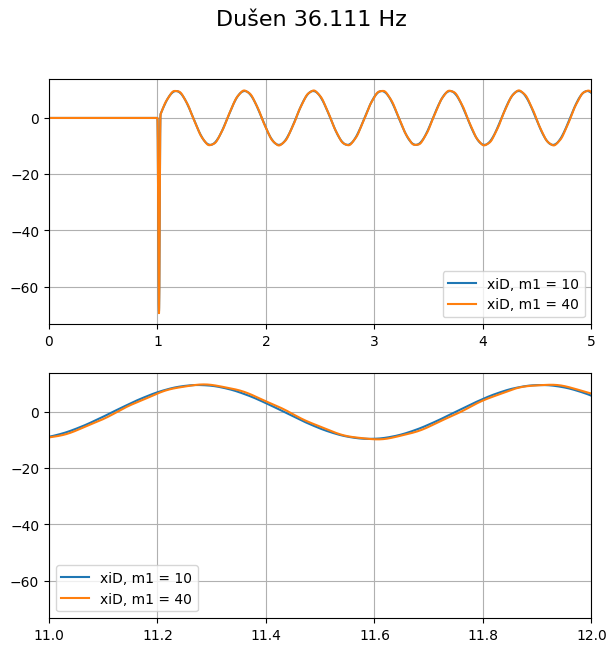

In [153]:
for j in range(0, len(frek)):
    fig = plt.figure(figsize=(7, 7))
    fig.suptitle(f'Dušen {frek[j]:.3f} Hz', fontsize=16)
    plt.subplot(2, 1, 1)
    plt.plot(t,rez_x_10[4*j+1][:], label=f'xiD, m1 = 10')
    plt.plot(t,rez_x_40[4*j+1][:], label=f'xiD, m1 = 40')
    plt.xlim(0, 5)
    plt.grid()
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t,rez_x_10[4*j+1][:], label=f'xiD, m1 = 10')
    plt.plot(t,rez_x_40[4*j+1][:], label=f'xiD, m1 = 40')
    plt.xlim(11, 12)
    plt.grid()
    plt.legend()

# 2

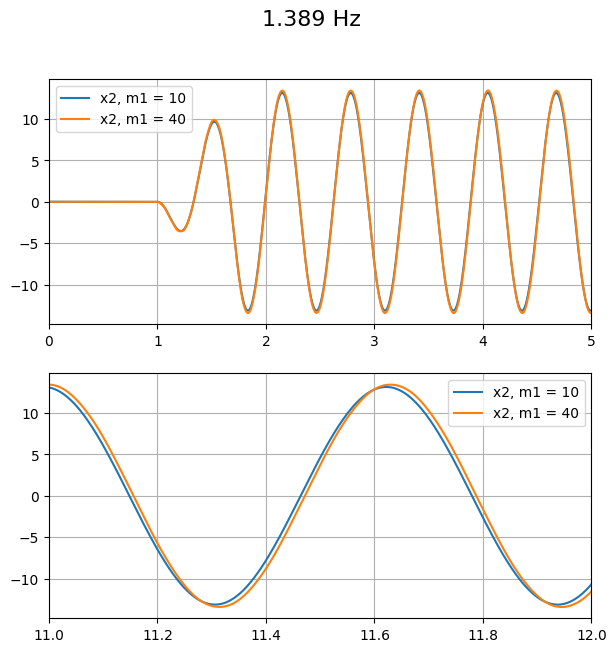

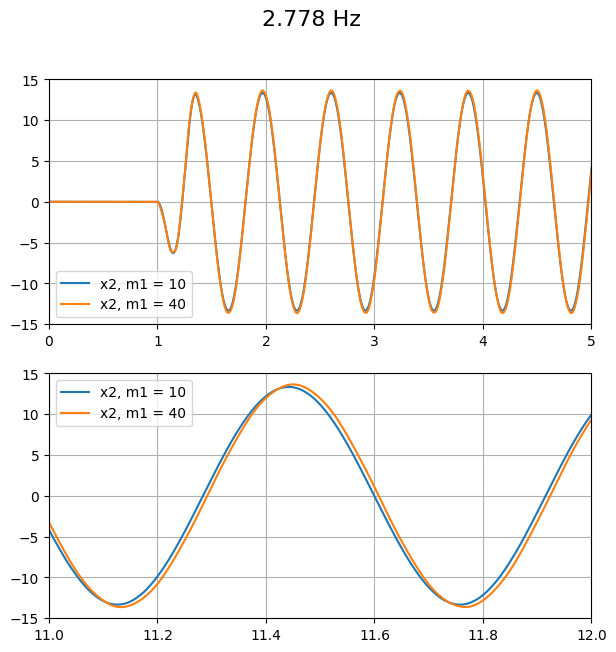

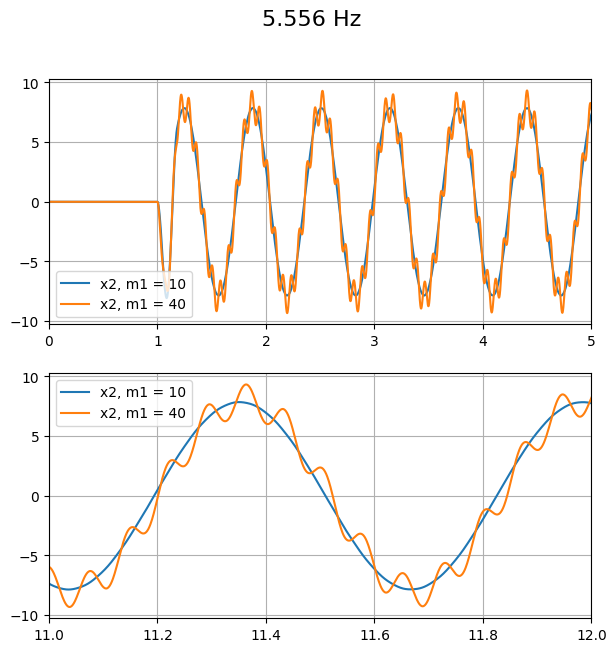

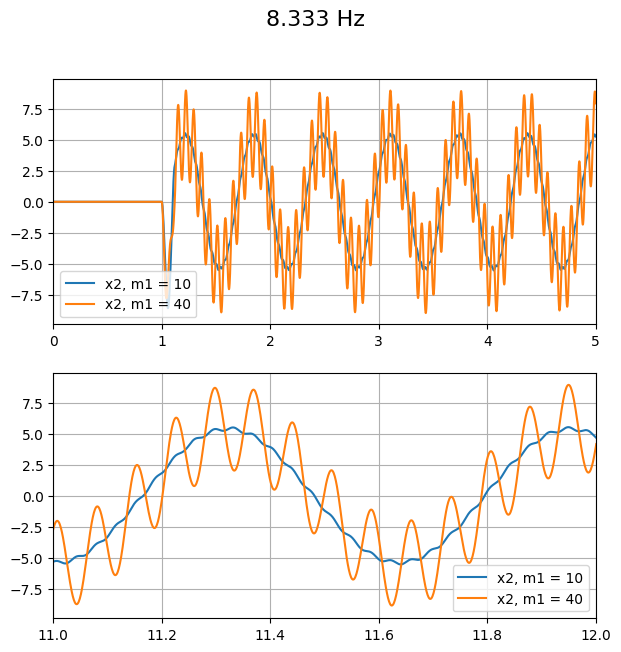

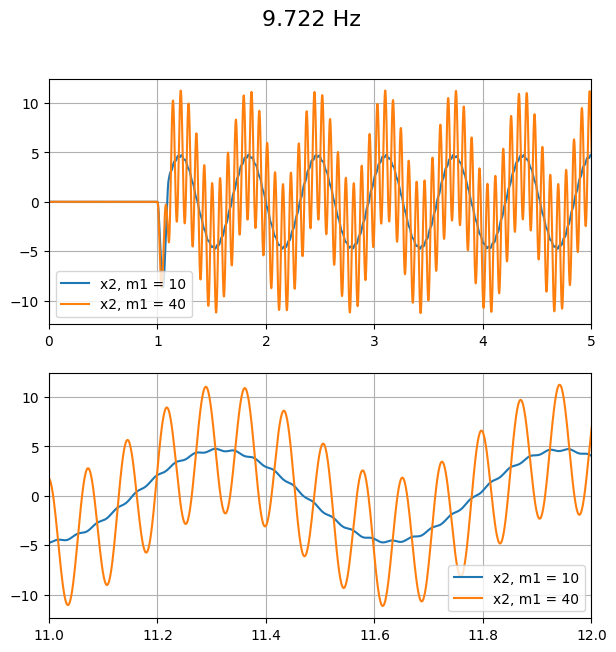

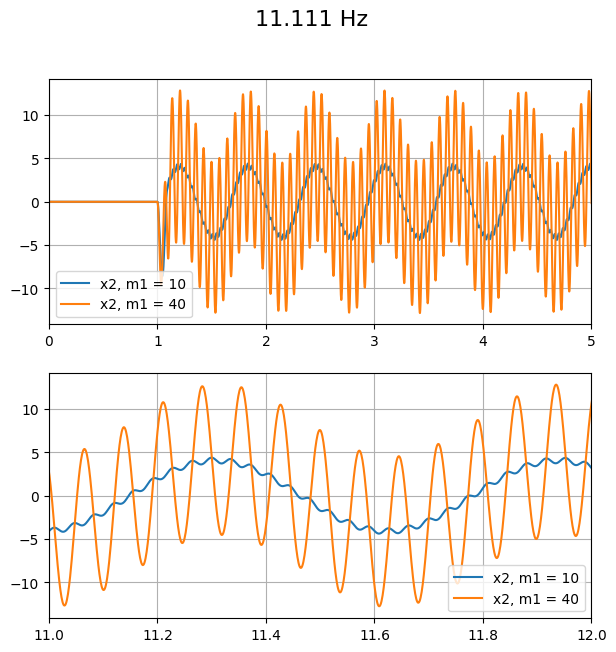

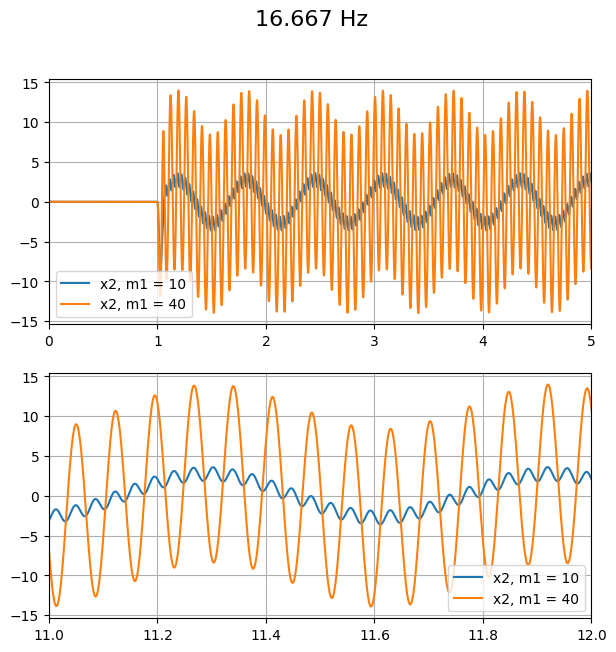

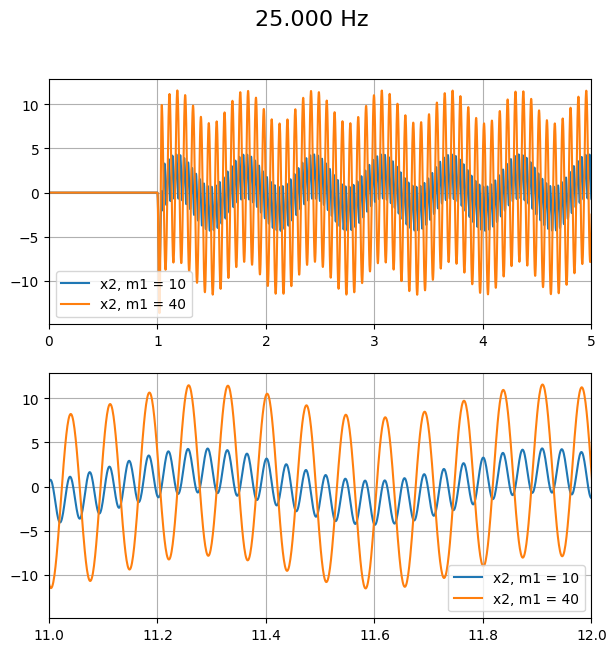

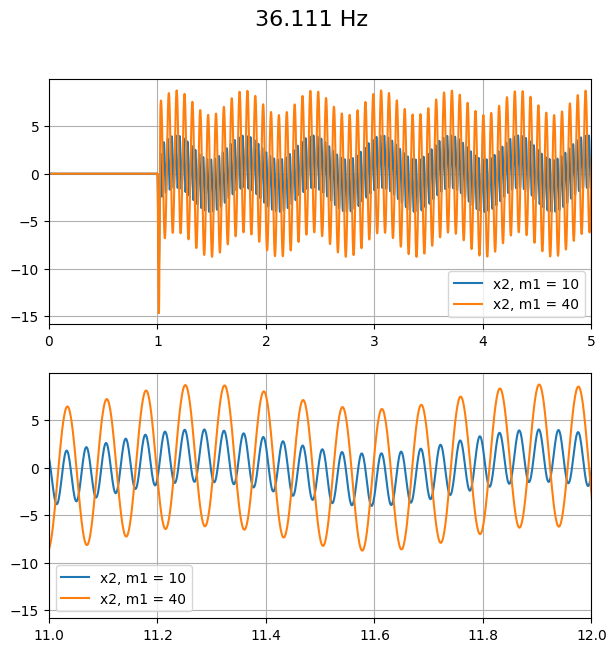

In [148]:
frek
for j in range(0, len(frek)):
    fig = plt.figure(figsize=(7, 7))
    fig.suptitle(f'{frek[j]:.3f} Hz', fontsize=16)
    plt.subplot(2, 1, 1)
    plt.plot(t,rez_x_10[4*j, :], label=f'x2, m1 = 10')
    plt.plot(t,rez_x_40[4*j, :], label=f'x2, m1 = 40')
    plt.xlim(0, 5)
    plt.grid()
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t,rez_x_10[4*j, :], label=f'x2, m1 = 10')
    plt.plot(t,rez_x_40[4*j, :], label=f'x2, m1 = 40')
    plt.xlim(11, 12)
    plt.grid()
    plt.legend()
# , {frek[j]:.3f} Hz )

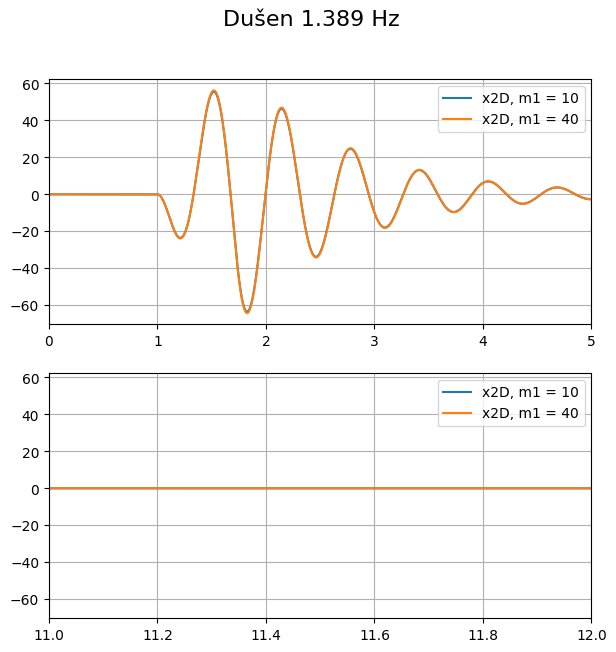

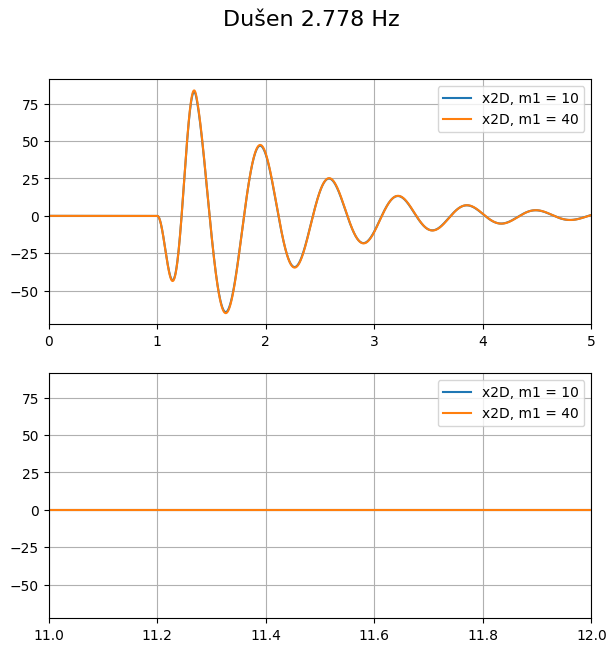

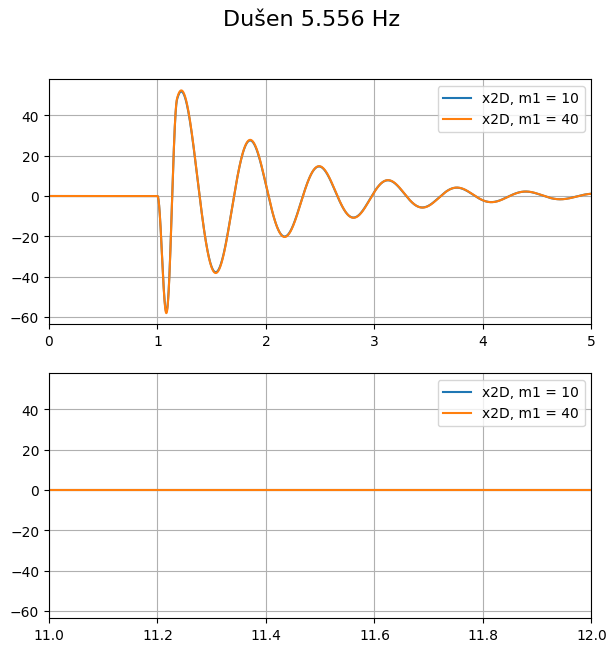

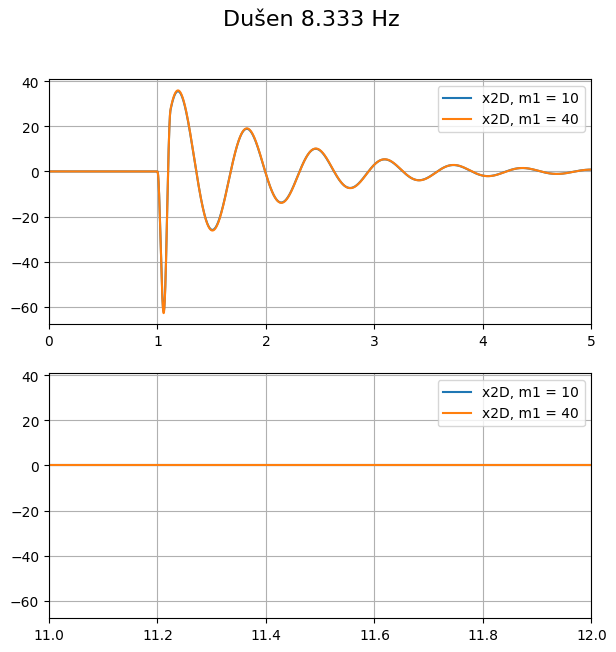

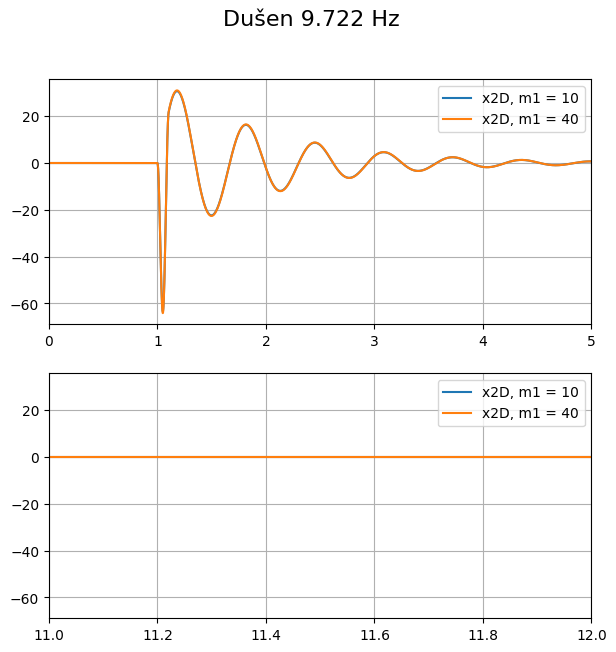

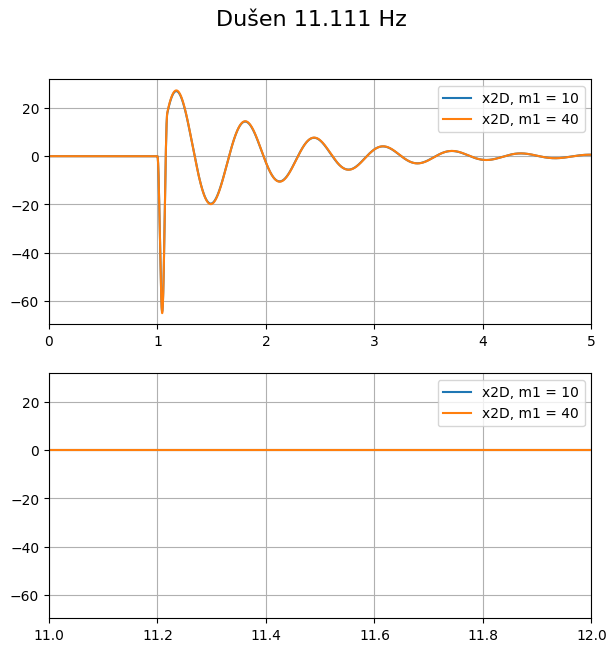

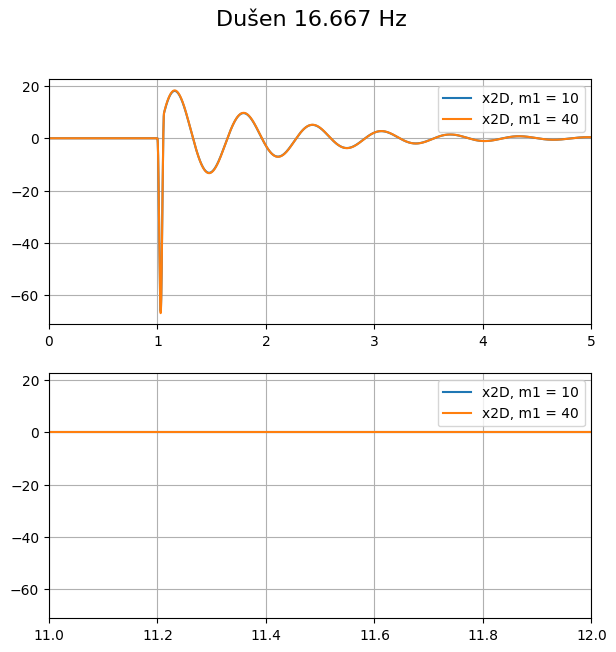

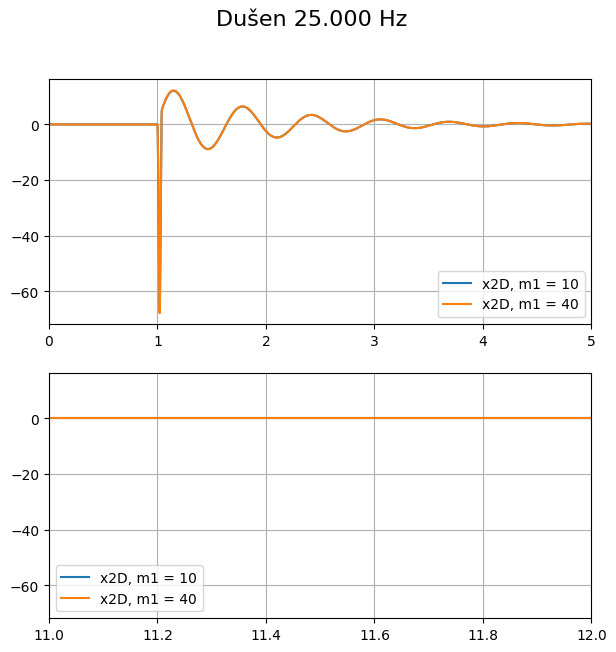

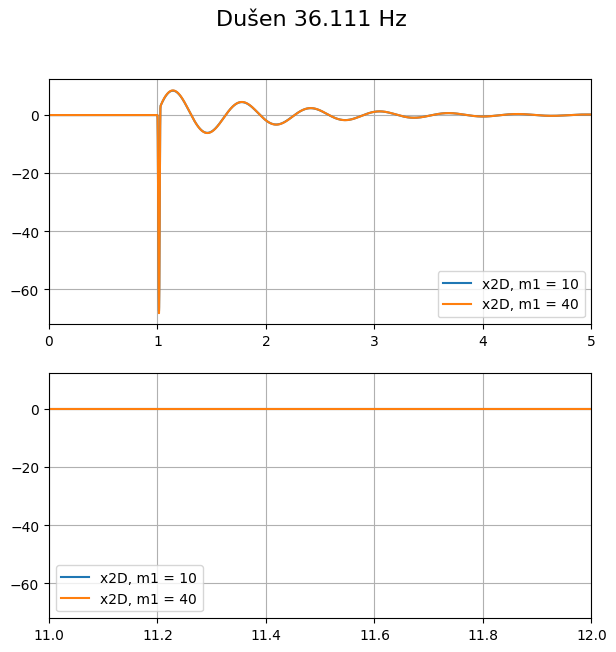

In [149]:
for j in range(0, len(frek)):
    fig = plt.figure(figsize=(7, 7))
    fig.suptitle(f'Dušen {frek[j]:.3f} Hz', fontsize=16)
    plt.subplot(2, 1, 1)
    plt.plot(t,rez_x_10[4*j+3, :], label=f'x2D, m1 = 10')
    plt.plot(t,rez_x_40[4*j+3, :], label=f'x2D, m1 = 40')
    plt.xlim(0, 5)
    plt.grid()
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t,rez_x_10[4*j+3, :], label=f'x2D, m1 = 10')
    plt.plot(t,rez_x_40[4*j+3, :], label=f'x2D, m1 = 40')
    plt.xlim(11, 12)
    plt.grid()
    plt.legend()